In [45]:
import pandas as pd
import os

In [78]:
base_hosp = 'mimic/mimic-iv-clinical-database-demo-2.2/hosp'
base_icu = 'mimic/mimic-iv-clinical-database-demo-2.2/icu'
base_ed = 'mimic/mimic-iv-ed-demo-2.2/ed'
base_notes = 'mimic/mimic-iv-notes-2.2/note'

In [47]:
icd = pd.read_csv('mimic/mimic-iv-3.1/hosp/d_icd_diagnoses.csv.gz')
_icd = icd.set_index(['icd_version', 'icd_code'])

In [48]:
ddx = pd.read_csv(os.path.join('mimic/mimic-iv-3.1/hosp/', 'diagnoses_icd.csv.gz'))
ddx = ddx.join(_icd, on=['icd_version', 'icd_code'])
ddx

,subject_id,hadm_id,seq_num,icd_code,icd_version,long_title
0,10000032,22595853,1,5723,9,Portal hypertension
1,10000032,22595853,2,78959,9,Other ascites
2,10000032,22595853,3,5715,9,Cirrhosis of liver without mention of alcohol
3,10000032,22595853,4,07070,9,Unspecified viral hepatitis C without hepatic ...
4,10000032,22595853,5,496,9,"Chronic airway obstruction, not elsewhere clas..."
...,...,...,...,...,...,...
6364483,19999987,23865745,7,41401,9,Coronary atherosclerosis of native coronary ar...
6364484,19999987,23865745,8,78039,9,Other convulsions
6364485,19999987,23865745,9,0413,9,Friedländer's bacillus infection in conditions...
6364486,19999987,23865745,10,36846,9,Homonymous bilateral field defects


In [57]:
from collections import Counter

Counter([t for t in ddx.long_title if "bronchiectasis" in t.lower() or "bronchitis" in t.lower() or "pneumonia" in t.lower() or ("malignant" in t.lower() and "lung" in t.lower())])

Counter({'Pneumonia, organism unspecified': 11173,
         'Pneumonia, unspecified organism': 9415,
         'Secondary malignant neoplasm of lung': 3341,
         'Obstructive chronic bronchitis with (acute) exacerbation': 2833,
         'Ventilator associated pneumonia': 2347,
         'Klebsiella pneumoniae [K. pneumoniae] as the cause of diseases classified elsewhere': 2327,
         'Personal history of other malignant neoplasm of bronchus and lung': 2209,
         'Personal history of malignant neoplasm of bronchus and lung': 2113,
         'Secondary malignant neoplasm of unspecified lung': 1532,
         'Malignant neoplasm of bronchus and lung, unspecified': 1382,
         'Personal history of pneumonia (recurrent)': 1343,
         'Secondary malignant neoplasm of right lung': 1342,
         'Unspecified bacterial pneumonia': 1333,
         'Family history of malignant neoplasm of trachea, bronchus and lung': 1274,
         'Secondary malignant neoplasm of left lung': 1211,
 

,subject_id,hadm_id,seq_num,icd_code,icd_version,long_title
0,10000032,22595853,1,5723,9,Portal hypertension
1,10000032,22595853,2,78959,9,Other ascites
2,10000032,22595853,3,5715,9,Cirrhosis of liver without mention of alcohol
3,10000032,22595853,4,07070,9,Unspecified viral hepatitis C without hepatic ...
4,10000032,22595853,5,496,9,"Chronic airway obstruction, not elsewhere clas..."
...,...,...,...,...,...,...
6364483,19999987,23865745,7,41401,9,Coronary atherosclerosis of native coronary ar...
6364484,19999987,23865745,8,78039,9,Other convulsions
6364485,19999987,23865745,9,0413,9,Friedländer's bacillus infection in conditions...
6364486,19999987,23865745,10,36846,9,Homonymous bilateral field defects


In [63]:
s = ddx[ddx.long_title.isin(set([t for t in ddx.long_title if "bronchiectasis" in t.lower() or "bronchitis" in t.lower() or "pneumonia" in t.lower() or ("malignant" in t.lower() and "lung" in t.lower())]))]

In [149]:
labevents.query('hadm_id==26486158')

,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
54,172548,10014354,26486158.0,29769552,51237,NaN,2148-08-24 00:00:00,2148-08-24 01:29:00,1.1,1.10,NaN,0.9,1.1,NaN,ROUTINE,NaN
55,172550,10014354,26486158.0,29769552,51275,NaN,2148-08-24 00:00:00,2148-08-24 01:29:00,45.0,45.00,sec,25.0,36.5,abnormal,ROUTINE,NaN
56,172549,10014354,26486158.0,29769552,51274,NaN,2148-08-24 00:00:00,2148-08-24 01:29:00,12.1,12.10,sec,9.4,12.5,NaN,ROUTINE,NaN
57,172547,10014354,26486158.0,29769552,51214,NaN,2148-08-24 00:00:00,2148-08-24 01:29:00,468,468.00,mg/dL,180.0,400.0,abnormal,ROUTINE,NaN
58,172568,10014354,26486158.0,46932894,51255,NaN,2148-08-24 00:00:00,2148-08-24 01:32:00,1,1.00,%,0.0,0.0,abnormal,ROUTINE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103723,174726,10014354,26486158.0,28451177,51133,NaN,2148-09-07 05:55:00,2148-09-07 07:59:00,10.44,10.44,K/uL,1.2,3.7,abnormal,STAT,NaN
103724,174757,10014354,26486158.0,28451177,52074,NaN,2148-09-07 05:55:00,2148-09-07 07:59:00,1.24,1.24,K/uL,0.2,0.8,abnormal,STAT,NaN
103725,174730,10014354,26486158.0,28451177,51146,NaN,2148-09-07 05:55:00,2148-09-07 07:59:00,0,0.00,%,0.0,1.0,NaN,STAT,NaN
103726,174728,10014354,26486158.0,28451177,51143,NaN,2148-09-07 05:55:00,2148-09-07 07:59:00,0,0.00,%,0.0,0.0,NaN,STAT,NaN


In [141]:
ddx.query('icd_version==10').icd_code.nunique()

19440

In [146]:
ddx.query('icd_version==10').icd_code.apply(lambda x: x[:4]).nunique()

7247

In [ ]:
ddx = pd.read_csv(os.path.join(base_hosp, 'diagnoses_icd.csv.gz'))
ddx = ddx.join(_icd, on=['icd_version', 'icd_code'])
ddx

,subject_id,hadm_id,seq_num,icd_code,icd_version,long_title
0,10035185,22580999,3,4139,9,Other and unspecified angina pectoris
1,10035185,22580999,10,V707,9,Examination of participant in clinical trial
2,10035185,22580999,1,41401,9,Coronary atherosclerosis of native coronary ar...
3,10035185,22580999,9,3899,9,Unspecified hearing loss
4,10035185,22580999,11,V8532,9,"Body Mass Index 32.0-32.9, adult"
...,...,...,...,...,...,...
4501,10004733,27411876,19,3129,9,Unspecified disturbance of conduct
4502,10004733,27411876,30,30000,9,"Anxiety state, unspecified"
4503,10004733,27411876,26,4739,9,Unspecified sinusitis (chronic)
4504,10004733,27411876,22,56210,9,Diverticulosis of colon (without mention of he...


In [50]:
note_dc = pd.read_csv(os.path.join(base_notes, 'discharge_demo.csv'))

In [69]:
ddx.query('hadm_id == 22741225').sort_values('seq_num')

,subject_id,hadm_id,seq_num,icd_code,icd_version,long_title
2095,10014354,22741225,1,I69354,10,Hemiplegia and hemiparesis following cerebral ...
2088,10014354,22741225,2,C9110,10,Chronic lymphocytic leukemia of B-cell type no...
2101,10014354,22741225,3,G8194,10,"Hemiplegia, unspecified affecting left nondomi..."
2103,10014354,22741225,4,Z9282,10,Status post administration of tPA (rtPA) in a ...
2097,10014354,22741225,5,E785,10,"Hyperlipidemia, unspecified"
2092,10014354,22741225,6,I10,10,Essential (primary) hypertension
2089,10014354,22741225,7,M25512,10,Pain in left shoulder
2100,10014354,22741225,8,E0865,10,Diabetes mellitus due to underlying condition ...
2090,10014354,22741225,9,J449,10,"Chronic obstructive pulmonary disease, unspeci..."
2099,10014354,22741225,10,E6601,10,Morbid (severe) obesity due to excess calories


In [67]:
note_dc.query('subject_id == 10014354')

,note_id,subject_id,hadm_id,note_type,note_seq,charttime,storetime,text
77,10014354-DS-10,10014354,22741225,DS,10,2146-10-12 00:00:00,2146-10-13 14:26:00,\nName: ___ Unit No: ___\...
78,10014354-DS-11,10014354,28335091,DS,11,2147-04-29 00:00:00,2147-04-29 18:17:00,\nName: ___ Unit No: ___\...
79,10014354-DS-12,10014354,27494880,DS,12,2147-06-04 00:00:00,2147-06-04 16:26:00,\nName: ___ Unit No: ___\...
80,10014354-DS-13,10014354,22502504,DS,13,2147-09-12 00:00:00,2147-09-25 16:11:00,\nName: ___ Unit No: ___\...
81,10014354-DS-14,10014354,26013492,DS,14,2147-11-16 00:00:00,2147-11-16 20:23:00,\nName: ___ Unit No: ___\...
82,10014354-DS-15,10014354,29780751,DS,15,2147-11-30 00:00:00,2147-11-30 12:53:00,\nName: ___ Unit No: ___\...
83,10014354-DS-16,10014354,22508257,DS,16,2148-05-20 00:00:00,2148-05-20 16:20:00,\nName: ___ Unit No: ___\...
84,10014354-DS-17,10014354,23132022,DS,17,2148-06-28 00:00:00,2148-06-28 14:01:00,\nName: ___ Unit No: ___\...
85,10014354-DS-18,10014354,27487226,DS,18,2148-07-13 00:00:00,2148-07-13 23:33:00,\nName: ___ Unit No: ___\...
86,10014354-DS-19,10014354,27562275,DS,19,2148-07-20 00:00:00,2148-07-21 17:55:00,\nName: ___ Unit No: ___\...


In [52]:
note_rad = pd.read_csv(os.path.join(base_notes, 'radiology_demo.csv'))

In [60]:
note_rad.query('subject_id==10014354').sort_values('charttime')

,note_id,subject_id,hadm_id,note_type,note_seq,charttime,storetime,text
643,10014354-RR-6,10014354,NaN,RR,6,2146-08-07 13:09:00,2146-08-07 16:36:00,EXAMINATION: CT abdomen pelvis with contrast\...
652,10014354-RR-7,10014354,22741225.0,RR,7,2146-10-08 22:09:00,2146-10-08 22:52:00,EXAMINATION: CTA HEAD AND CTA NECK PQ147 CT H...
655,10014354-RR-8,10014354,22741225.0,RR,8,2146-10-09 04:29:00,2146-10-09 10:48:00,EXAMINATION: CHEST (PORTABLE AP)\n\nINDICATIO...
656,10014354-RR-9,10014354,22741225.0,RR,9,2146-10-09 15:12:00,2146-10-09 16:31:00,EXAMINATION: CT HEAD W/O CONTRAST Q111 CT HEA...
600,10014354-RR-10,10014354,22741225.0,RR,10,2146-10-10 14:30:00,2146-10-10 14:53:00,EXAMINATION: SHOULDER ___ VIEWS NON TRAUMA RI...
601,10014354-RR-11,10014354,NaN,RR,11,2146-11-08 22:38:00,2146-11-08 23:05:00,EXAMINATION: CHEST (PA AND LAT)\n\nINDICATION...
602,10014354-RR-12,10014354,27494880.0,RR,12,2147-06-04 00:11:00,2147-06-04 02:16:00,EXAMINATION: Chest radiograph\n\nINDICATION: ...
603,10014354-RR-13,10014354,NaN,RR,13,2147-08-25 14:44:00,2147-08-25 16:54:00,INDICATION: Preop\n\nTECHNIQUE: Chest PA a...
604,10014354-RR-14,10014354,NaN,RR,14,2147-09-13 13:05:00,2147-09-13 15:40:00,INDICATION: ___ year old man with hx of Radic...
605,10014354-RR-17,10014354,NaN,RR,17,2147-09-16 11:30:00,2147-09-16 13:20:00,EXAMINATION: CT CHEST W/CONTRAST\n\nINDICATIO...


In [70]:
labevents = pd.read_csv(os.path.join(base_hosp, 'labevents.csv.gz'))

In [74]:
labevents.query('hadm_id == 22741225').head(20)

,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
17152,168245,10014354,22741225.0,1632505,51251,NaN,2146-10-09 06:04:00,2146-10-09 08:12:00,0,0.00,%,0.00,0.00,NaN,STAT,NaN
17153,168233,10014354,22741225.0,1632505,51143,NaN,2146-10-09 06:04:00,2146-10-09 08:12:00,0,0.00,%,0.00,0.00,NaN,STAT,NaN
17154,168258,10014354,22741225.0,1632505,52069,NaN,2146-10-09 06:04:00,2146-10-09 08:12:00,0.00,0.00,K/uL,0.01,0.08,abnormal,STAT,NaN
17155,168234,10014354,22741225.0,1632505,51144,NaN,2146-10-09 06:04:00,2146-10-09 08:12:00,0,0.00,%,0.00,5.00,NaN,STAT,NaN
17156,168231,10014354,22741225.0,1632505,51133,NaN,2146-10-09 06:04:00,2146-10-09 08:12:00,57.41,57.41,K/uL,1.20,3.70,abnormal,STAT,NaN
17157,168249,10014354,22741225.0,1632505,51256,NaN,2146-10-09 06:04:00,2146-10-09 08:12:00,___,7.00,%,34.00,71.00,abnormal,STAT,___
17158,168259,10014354,22741225.0,1632505,52073,NaN,2146-10-09 06:04:00,2146-10-09 08:12:00,0.00,0.00,K/uL,0.04,0.54,abnormal,STAT,NaN
17159,168240,10014354,22741225.0,1632505,51244,NaN,2146-10-09 06:04:00,2146-10-09 08:12:00,92,92.00,%,19.00,53.00,abnormal,STAT,NaN
17160,168252,10014354,22741225.0,1632505,51266,NaN,2146-10-09 06:04:00,2146-10-09 08:12:00,NaN,NaN,NaN,NaN,NaN,NaN,STAT,NORMAL.
17161,168248,10014354,22741225.0,1632505,51255,NaN,2146-10-09 06:04:00,2146-10-09 08:12:00,0,0.00,%,0.00,0.00,NaN,STAT,NaN


In [88]:
pd.read_csv(os.path.join(base_hosp, 'prescriptions.csv.gz'))

,subject_id,hadm_id,pharmacy_id,poe_id,poe_seq,order_provider_id,starttime,stoptime,drug_type,drug,...,gsn,ndc,prod_strength,form_rx,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,doses_per_24_hrs,route
0,10027602,28166872,27168639,NaN,NaN,NaN,2201-10-30 12:00:00,NaN,MAIN,Fentanyl Citrate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10027602,28166872,40720238,NaN,NaN,NaN,2201-10-30 12:00:00,NaN,MAIN,Fentanyl Citrate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10027602,28166872,62845687,NaN,NaN,NaN,2201-10-31 12:00:00,NaN,MAIN,Lorazepam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10027602,28166872,24340150,NaN,NaN,NaN,2201-10-30 12:00:00,NaN,MAIN,Midazolam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10027602,28166872,14435820,NaN,NaN,NaN,2201-10-30 12:00:00,NaN,MAIN,Midazolam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18082,10038081,20755971,33730068,10038081-378,378.0,P92KOD,2115-10-11 14:00:00,2115-10-13 07:00:00,MAIN,Artificial Tears,...,030016,2.305060e+07,0.4 mL DROPPERETTE,NaN,1-2,DROP,0.1667-0.3333,DRP,NaN,BOTH EYES
18083,10002428,23473524,87358294,10002428-780,780.0,P71IN4,2156-05-12 13:00:00,2156-05-22 18:00:00,MAIN,Artificial Tears,...,030016,2.305060e+07,0.3mL UD,NaN,1-2,DROP,0.1667-0.3333,DRP,NaN,BOTH EYES
18084,10040025,27996267,81941017,10040025-1640,1640.0,P52ORO,2148-01-26 19:00:00,2148-01-26 18:00:00,MAIN,OxyCODONE (Immediate Release),...,046474,9.046446e+08,15mg Tablet,NaN,5-10,mg,0.3333-0.6667,TAB,NaN,PO/NG
18085,10014354,26228185,46019806,10014354-3105,3105.0,P748G6,2150-05-01 01:00:00,2150-05-01 09:00:00,MAIN,Carbamide Peroxide 6.5%,...,008120,7.811207e+10,15mL Bottle,NaN,5-10,DROP,0.3333-0.6667,BTL,1.0,BOTH EARS


In [105]:
pd.read_csv(os.path.join(base_ed, 'edstays.csv.gz')).query('subject_id==10018328')

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition
1,10018328,26706939.0,34176810,2154-02-05 17:09:00,2154-02-05 22:54:00,F,WHITE,AMBULANCE,ADMITTED
2,10018328,NaN,32103106,2154-08-03 15:31:00,2154-08-03 22:29:00,F,WHITE,AMBULANCE,HOME


In [112]:
ddx.query('subject_id==10018328').sort_values(['hadm_id','seq_num'])

,subject_id,hadm_id,seq_num,icd_code,icd_version,long_title
681,10018328,23786647,1,I671,10,"Cerebral aneurysm, nonruptured"
678,10018328,23786647,2,G936,10,Cerebral edema
676,10018328,23786647,3,I5031,10,Acute diastolic (congestive) heart failure
683,10018328,23786647,4,R4701,10,Aphasia
672,10018328,23786647,5,D62,10,Acute posthemorrhagic anemia
680,10018328,23786647,6,I97618,10,Postprocedural hemorrhage of a circulatory sys...
675,10018328,23786647,7,J942,10,Hemothorax
671,10018328,23786647,8,I97131,10,Postprocedural heart failure following other s...
674,10018328,23786647,9,I9752,10,Accidental puncture and laceration of a circul...
673,10018328,23786647,10,I10,10,Essential (primary) hypertension


In [126]:
print(note_dc.query('subject_id==10018328').text[123])

 
Name:  ___               Unit No:   ___
 
Admission Date:  ___              Discharge Date:   ___
 
Date of Birth:  ___             Sex:   F
 
Service: NEUROSURGERY
 
Allergies: 
amoxicillin / Penicillins
 
Attending: ___.
 
Chief Complaint:
Aneurysm at left internal carotid/left posterior communicating 
artery bifurcation.
 
Major Surgical or Invasive Procedure:
___: pipeline embolization of aneurysm at left internal 
carotid/left posterior communicating artery bifurcation 

 
History of Present Illness:
Ms. ___ is an ___ year old female who was admitted to ___ 
in ___ after a syncopal fall while shopping. She sustained 
T3 & T6 vertebral fractures. She underwent an extensive workup 
during her admission, and brain imaging revealed an incidental 
2.4 x 1.5 cm left internal carotid aneurysm arising at the 
bifurcation of the posterior communicating artery. She follow-ed 
up with Dr. ___ in outpatient clinic, at which time it was 
determined that she will undergo elective pipeline emb

In [129]:
pd.read_csv('mimic/mimic-iv-clinical-database-demo-2.2/hosp/transfers.csv.gz').careunit.unique()

array([nan, 'Med/Surg', 'Medicine', 'Vascular', 'Neurology', 'Transplant',
       'Med/Surg/GYN', 'Cardiac Surgery', 'Med/Surg/Trauma',
       'Discharge Lounge', 'Medicine/Cardiology', 'Trauma SICU (TSICU)',
       'Emergency Department', 'Coronary Care Unit (CCU)',
       'Medical Intensive Care Unit (MICU)',
       'Surgical Intensive Care Unit (SICU)',
       'Cardiac Vascular Intensive Care Unit (CVICU)',
       'Medical/Surgical Intensive Care Unit (MICU/SICU)', 'PACU',
       'Neuro Stepdown', 'Emergency Department Observation',
       'Hematology/Oncology', 'Neuro Intermediate',
       'Neuro Surgical Intensive Care Unit (Neuro SICU)',
       'Surgery/Trauma', 'Unknown', 'Cardiology Surgery Intermediate',
       'Hematology/Oncology Intermediate', 'Observation',
       'Medicine/Cardiology Intermediate', 'Cardiology', 'Psychiatry'],
      dtype=object)

In [67]:
import matplotlib.pyplot as plt

pts = pd.read_csv('mimic/mimic-iv-3.1/hosp/patients.csv.gz')

In [72]:
# s = list(set(s.subject_id))
pts = pts.query(f"subject_id in {s}")

(array([ 244.,  384.,  363.,  536.,  613.,  516.,  875., 1252., 1255.,
        2221., 2551., 2258., 3292., 3392., 2456., 3111., 2918., 1981.,
        2174., 2404.]),
 array([18.  , 21.65, 25.3 , 28.95, 32.6 , 36.25, 39.9 , 43.55, 47.2 ,
        50.85, 54.5 , 58.15, 61.8 , 65.45, 69.1 , 72.75, 76.4 , 80.05,
        83.7 , 87.35, 91.  ]),
 <BarContainer object of 20 artists>)

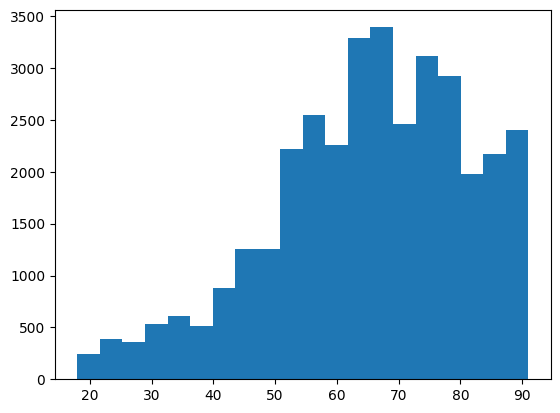

In [77]:
plt.hist(pts.anchor_age, bins=20)

In [ ]:
pd.read_csv('mimic/mimic-iv-3.1/hosp/patients.csv.gz')

In [85]:
adm = pd.read_csv('mimic/mimic-iv-3.1/hosp/admissions.csv.gz')

In [87]:
adm.subject_id.value_counts()

subject_id
15496609    238
15464144    185
10714009    163
16662316    142
14394983    138
           ... 
14325002      1
14325029      1
14325212      1
14325237      1
19999987      1
Name: count, Length: 223452, dtype: int64

In [ ]:
34499716